In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We will start by reading in the by now standard Titanic dataset. It contains infromation about passengers of the Titanic. The informations contain i.a. sex, age, name and familly and passenger class as well as information if the passenger survived or died in the disaster. You can find more information about this data set [here](http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf). 

The data set is in "coma separted values" (csv) format and the read it we will use the [pandas](https://pandas.pydata.org) library. Pandas library provides tools for manipulating  data frames and series and is widly used in data science projects. 

In [2]:
data = pd.read_csv("titanic3.csv")

We can check what attributes are stored in the DataFrame by listing the column names:

In [3]:
data.columns

Index(['Unnamed: 0', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body',
       'home.dest'],
      dtype='object')

or get a quick preview using ```head``` function: 

In [4]:
data.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


For the description of the features please see the link given above. 

Another usefull function is ```info```:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1309 non-null   int64  
 1   pclass      1309 non-null   int64  
 2   survived    1309 non-null   int64  
 3   name        1309 non-null   object 
 4   sex         1309 non-null   object 
 5   age         1046 non-null   float64
 6   sibsp       1309 non-null   int64  
 7   parch       1309 non-null   int64  
 8   ticket      1309 non-null   object 
 9   fare        1308 non-null   float64
 10  cabin       295 non-null    object 
 11  embarked    1307 non-null   object 
 12  boat        486 non-null    object 
 13  body        121 non-null    float64
 14  home.dest   745 non-null    object 
dtypes: float64(3), int64(5), object(7)
memory usage: 153.5+ KB


As we can see not all attributes are know (non-null) for every passanger. This is a frequent situation in real datasets. 

## Problem 1

a) Implement a Bayes classifier for predicting passenger survival  using sex and pclass  features. 

We will start by extracting from the frame the only the information we need:

In [6]:
data_pclass_sex = data[['pclass', 'sex', 'survived']]

In [7]:
data_pclass_sex.head()

,pclass,sex,survived
0,1,female,1
1,1,male,1
2,1,female,0
3,1,male,0
4,1,female,0


In [8]:
data_pclass_sex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pclass    1309 non-null   int64 
 1   sex       1309 non-null   object
 2   survived  1309 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 30.8+ KB


Then we need to group passengers according to sex, class and survival status. This can be achived using  the ```groupby``` function:

In [9]:
# Data grouping
grouped = data_pclass_sex.groupby(['survived','sex','pclass'])

We can count the number of passegers in each group using function ```size```:

counts = grouped.size()

In [10]:
# Data groups counts
counts = grouped.size()

Object ```counts``` contains all the information that we need to construct the classifier:

In [11]:
print(counts)

survived  sex     pclass
0         female  1           5
                  2          12
                  3         110
          male    1         118
                  2         146
                  3         418
1         female  1         139
                  2          94
                  3         106
          male    1          61
                  2          25
                  3          75
dtype: int64


You can index ```counts``` to obtain information on specified subgroups. E.g. ```counts[0]``` is a subgroup  that contains people that perished in the disaster. 

In [12]:
print(counts[0])

sex     pclass
female  1           5
        2          12
        3         110
male    1         118
        2         146
        3         418
dtype: int64


In [13]:
counts[(0,'female')]

pclass
1      5
2     12
3    110
dtype: int64

Function ```sum``` can be used to count all passengers in a given (sub)group:

In [14]:
n_passengers = counts.sum()
n_survivors = counts[1].sum()
n_dead = counts[0].sum()

print(n_passengers, n_survivors, n_dead)
print(n_survivors+n_dead==n_passengers)

1309 500 809
True


To implement classifier we need to calculate the conditional probability of survival given sex and class:

$$P(surv|sex, pclass)$$

We can use the Bayes theorem but it will be actually quicker to calculate it directly from the definition:

$$P(surv|sex, pclass)=\frac{P(surv,sex, pclass)}{P(sex, pclass)}
\approx \frac{\#(surv,sex, pclass)}{\#(sex,pclass)}$$

where by $\#$ I have denoted the number of passengers with given attributes. For example the probability of survival for a women traveling in second class was: 

$$\frac{\text{number of women in second class that survived}}{\text{number of women in second class}}$$

That can be calculated using the `counts` object:

In [15]:
# Survival probabilities for each group calculation
Ps_f_1 = counts[(1,'female',1)]/(counts[(1,'female',1)]+counts[(0,'female',1)])
print("Probability of survival for female in 1st class = ",Ps_f_1)

Ps_f_2 = counts[(1,'female',2)]/(counts[(1,'female',2)]+counts[(0,'female',2)])
print("Probability of survival for female in 2nd class = ",Ps_f_2)

Ps_f_3 = counts[(1,'female',3)]/(counts[(1,'female',3)]+counts[(0,'female',3)])
print("Probability of survival for female in 3rd class = ",Ps_f_3)

Ps_m_1 = counts[(1,'male',1)]/(counts[(1,'male',1)]+counts[(0,'male',1)])
print("Probability of survival for male in 1st class = ",Ps_m_1)

Ps_m_2 = counts[(1,'male',2)]/(counts[(1,'male',2)]+counts[(0,'male',2)])
print("Probability of survival for male in 12nd class = ",Ps_m_2)

Ps_m_3 = counts[(1,'male',3)]/(counts[(1,'male',3)]+counts[(0,'male',3)])
print("Probability of survival for male in 3rd class = ",Ps_m_3)

Probability of survival for female in 1st class =  0.9652777777777778
Probability of survival for female in 2nd class =  0.8867924528301887
Probability of survival for female in 3rd class =  0.49074074074074076
Probability of survival for male in 1st class =  0.3407821229050279
Probability of survival for male in 12nd class =  0.14619883040935672
Probability of survival for male in 3rd class =  0.15212981744421908


This operation has to be repeated for every sex and class combination. 

b) Calculate TPR and FPR on test set. Draw the ROC curve and calculate AUC score

In [16]:
# TPR and FPR calculation
print("Probability of survival is greater than 0.5 for females in 1st class and females in 2nd class - those two groups are predicted to survive. That means TPR and FPR are as follow: ")

TPR = (counts[(1,'female',1)] + counts[(1,'female',2)])/(counts[(1,'female',1)] + counts[(0,'female',1)] + counts[(1,'female',2)] + counts[(0,'female',2)])

FPR = (counts[(0,'female',1)] + counts[(0,'female',2)])/(counts[(1,'female',1)] + counts[(0,'female',1)] + counts[(1,'female',2)] + counts[(0,'female',2)])

print("TPR = ",TPR)
print("FPR = ",FPR)

Probability of survival is greater than 0.5 for females in 1st class and females in 2nd class - those two groups are predicted to survive. That means TPR and FPR are as follow: 
TPR =  0.932
FPR =  0.068


In [17]:
# Assigning survival probability to each passenger

def f(row):
    if row['sex'] == 'female' and row['pclass'] == 1:
        val = Ps_f_1
    elif row['sex'] == 'female' and row['pclass'] == 2:
        val = Ps_f_2
    elif row['sex'] == 'female' and row['pclass'] == 3:
        val = Ps_f_3
    elif row['sex'] == 'male' and row['pclass'] == 1:
        val = Ps_m_1
    elif row['sex'] == 'male' and row['pclass'] == 2:
        val = Ps_m_2
    elif row['sex'] == 'male' and row['pclass'] == 3:
        val = Ps_m_3
    return val


In [18]:
data_pclass_sex['probability'] = data_pclass_sex.apply(f, axis=1)

/home/konrad/anaconda3/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
data_pclass_sex.head()

,pclass,sex,survived,probability
0,1,female,1,0.965278
1,1,male,1,0.340782
2,1,female,0,0.965278
3,1,male,0,0.340782
4,1,female,0,0.965278


In [20]:
# Extracting labels and survival_probability columns from dataframe

labels_df = data_pclass_sex[['survived']]

survival_probability_df = data_pclass_sex[['probability']]
survival_probability_df.head()

,probability
0,0.965278
1,0.340782
2,0.965278
3,0.340782
4,0.965278


In [21]:
# Dataframe columns to arrays

labels = labels_df.to_numpy()
survival_probability = survival_probability_df.to_numpy()

print(labels,'\n')
print(survival_probability)

[[1]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]] 

[[0.96527778]
 [0.34078212]
 [0.96527778]
 ...
 [0.15212982]
 [0.15212982]
 [0.15212982]]


In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

In [23]:
# Roc curve function
fpr, tpr, ths = roc_curve(labels, survival_probability);

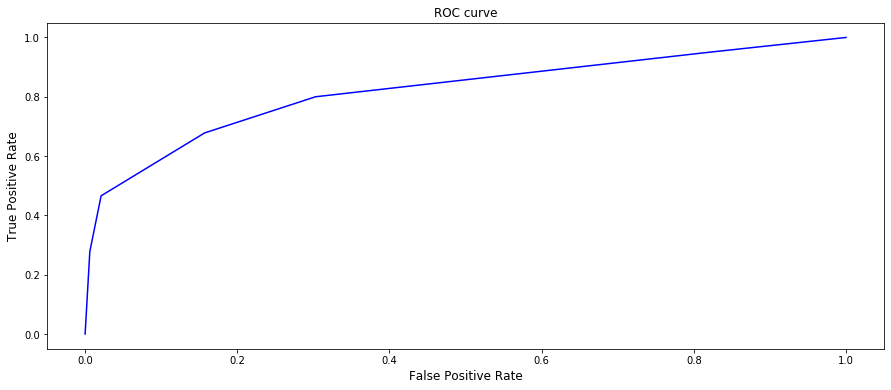

ROC curve for Bayes Classifier


In [24]:
# Roc curve drawing
fig1 = plt.figure(figsize=(15,6))

ax1 = fig1.add_subplot(111)
ax1.set_title("ROC curve")
ax1.set_xlabel("False Positive Rate",fontsize=12)
ax1.set_ylabel("True Positive Rate",fontsize=12)

ax1.plot(fpr, tpr,color="blue")

plt.show()

print('ROC curve for Bayes Classifier')

# plt.plot(fpr,tpr);

In [25]:
#AUC score
Bayes_AUC = roc_auc_score(labels, survival_probability)
print("AUC score for Bayes Classifier = ",Bayes_AUC)

AUC score for Bayes Classifier =  0.8200012360939432


c) Are those features conditionally independent? 

In [26]:
Ps_f = (counts[(1,'female')].sum())/(counts[(1,'female')].sum() + counts[(0,'female')].sum())
Ps_m = (counts[(1,'male')].sum())/(counts[(1,'male')].sum() + counts[(0,'male')].sum())

Ps_1 = (counts[(1,'female',1)] + counts[(1,'male',1)])/(counts[(1,'female',1)] + counts[(1,'male',1)] + counts[(0,'female',1)] + counts[(0,'male',1)])
Ps_2 = (counts[(1,'female',2)] + counts[(1,'male',2)])/(counts[(1,'female',2)] + counts[(1,'male',2)] + counts[(0,'female',2)] + counts[(0,'male',2)])
Ps_3 = (counts[(1,'female',2)] + counts[(1,'male',3)])/(counts[(1,'female',3)] + counts[(1,'male',3)] + counts[(0,'female',3)] + counts[(0,'male',3)])

print('Ps_f = ',Ps_f)
print('Ps_m = ',Ps_m,'\n')
print('Ps_1 = ',Ps_1)
print('Ps_2 = ',Ps_2)
print('Ps_3 = ',Ps_3)

Ps_f =  0.7274678111587983
Ps_m =  0.19098457888493475 

Ps_1 =  0.6191950464396285
Ps_2 =  0.4296028880866426
Ps_3 =  0.2383638928067701


In [27]:
print('Ps_f_1 = ',Ps_f_1,' and Ps_f * Ps_1 = ',Ps_f * Ps_1)

Ps_f_1 =  0.9652777777777778  and Ps_f * Ps_1 =  0.45044446511380704


In [28]:
counts[1].sum()

500

In [29]:
# Conditional sex or class category probabilities if passenger survived/died (for conditional independence check)
Pf_s = (counts[(1,'female')].sum())/(counts[1].sum())
Pm_s = (counts[(1,'male')].sum())/(counts[1].sum())

Pf_d = (counts[(0,'female')].sum())/(counts[0].sum())
Pm_d = (counts[(0,'male')].sum())/(counts[0].sum())

P1_s = (counts[(1,'female',1)] + counts[(1,'male',1)])/(counts[1].sum())
P2_s = (counts[(1,'female',2)] + counts[(1,'male',2)])/(counts[1].sum())
P3_s = (counts[(1,'female',3)] + counts[(1,'male',3)])/(counts[1].sum())

P1_d = (counts[(0,'female',1)] + counts[(0,'male',1)])/(counts[0].sum())
P2_d = (counts[(0,'female',2)] + counts[(0,'male',2)])/(counts[0].sum())
P3_d = (counts[(0,'female',3)] + counts[(0,'male',3)])/(counts[0].sum())

print(Pf_s)

0.678


In [30]:
# Conditional sex and class category probabilities if passenger survived/died (for conditional independence check)
Pf1_s = counts[(1,'female',1)] /(counts[1].sum())
Pf2_s = counts[(1,'female',2)] /(counts[1].sum())
Pf3_s = counts[(1,'female',3)] /(counts[1].sum())

Pm1_s = counts[(1,'male',1)] /(counts[1].sum())
Pm2_s = counts[(1,'male',2)] /(counts[1].sum())
Pm3_s = counts[(1,'male',3)] /(counts[1].sum())

print(Pf1_s)

print(Pf_s * P1_s)

0.278
0.27120000000000005


In [31]:
print("Conditional independence examples:\n")
print("1st class female probability if survived (Bayes probability)= ",Pf1_s)
print("1st class female probability if survived (Naive Bayes probability)= ",Pf_s * P1_s)

print("2nd class male probability if survived (Bayes probability)= ",Pm2_s)
print("2nd class male probability if survived (Naive Bayes probability)= ",Pm_s * P2_s)

print("Acquired probability values are very simmilar, so the variables are fairly conditionally independent")

Conditional independence examples:

1st class female probability if survived (Bayes probability)=  0.278
1st class female probability if survived (Naive Bayes probability)=  0.27120000000000005
2nd class male probability if survived (Bayes probability)=  0.05
2nd class male probability if survived (Naive Bayes probability)=  0.076636
Acquired probability values are very simmilar, so the variables are fairly conditionally independent


d) Implement a Naive bayes classifier using same features and compare it with a). 

In [32]:
# Naive Bayes survival probability calculation for each passenger
P_surv = counts[1].sum()/counts.sum()
P_death = counts[0].sum()/counts.sum()

def nb(row):
    if row['sex'] == 'female':
        P_f1_s = Pf_s
        P_f1_d = Pf_d
    elif row['sex'] == 'male':
        P_f1_s = Pm_s
        P_f1_d = Pm_d
        
    if row['pclass'] == 1:
        P_f2_s = P1_s 
        P_f2_d = P1_d
    elif row['pclass'] == 2:
        P_f2_s = P2_s 
        P_f2_d = P2_d
    elif row['pclass'] == 3:
        P_f2_s = P3_s 
        P_f2_d = P3_d
    
    val = (P_surv*P_f1_s*P_f2_s)/(P_surv*P_f1_s*P_f2_s + P_death*P_f1_d*P_f2_d)
    return val

In [33]:
data_pclass_sex['NB_probability'] = data_pclass_sex.apply(nb, axis=1)

/home/konrad/anaconda3/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
data_pclass_sex.head()

,pclass,sex,survived,probability,NB_probability
0,1,female,1,0.965278,0.875352
1,1,male,1,0.340782,0.383126
2,1,female,0,0.965278,0.875352
3,1,male,0,0.340782,0.383126
4,1,female,0,0.965278,0.875352


In [35]:
# data_pclass_sex = data[['pclass', 'sex', 'survived']]

survival_probability_nb_df = data_pclass_sex[['NB_probability']]
survival_probability_nb_df.head()

,NB_probability
0,0.875352
1,0.383126
2,0.875352
3,0.383126
4,0.875352


In [36]:
survival_probability_nb = survival_probability_nb_df.to_numpy()

print(labels,'\n')
print(survival_probability_nb)

[[1]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]] 

[[0.87535249]
 [0.38312586]
 [0.87535249]
 ...
 [0.11577799]
 [0.11577799]
 [0.11577799]]


In [37]:
# ROC curve funtion
fpr_nb, tpr_nb, ths_nb = roc_curve(labels, survival_probability_nb);

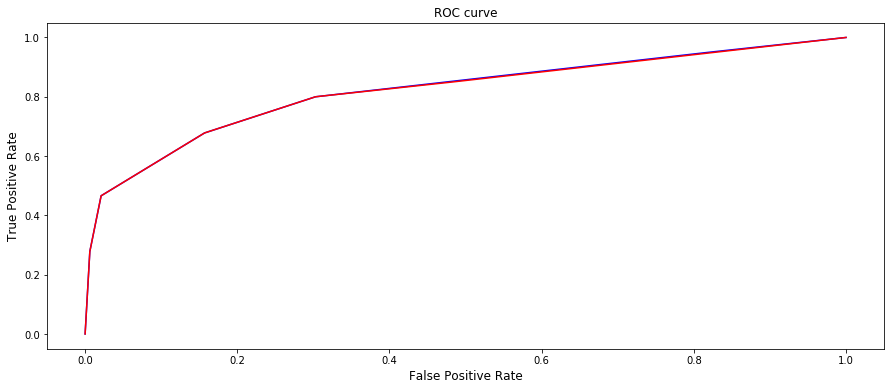

ROC curves for Bayes Classifier and Naive-Bayes Classifier almost perfectly overlap (Bayes Classifier ROC curve is almost enitrelly hidden under the Naive Bayes ROC curve)


In [39]:
# ROC curve drawing
fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(111)
ax.set_title("ROC curve")
ax.set_xlabel("False Positive Rate",fontsize=12)
ax.set_ylabel("True Positive Rate",fontsize=12)

ax.plot(fpr, tpr,color="blue") # Bayes Classifier ROC curve
ax.plot(fpr_nb, tpr_nb, color='red') # Naive Bayes Classifier ROC curve

plt.show()

print('ROC curves for Bayes Classifier and Naive-Bayes Classifier almost perfectly overlap (Bayes Classifier ROC curve is almost enitrelly hidden under the Naive Bayes ROC curve)')

In [40]:
# AUC scores for Bayes Classifier and Naive Bayes Classifier
Bayes_AUC = roc_auc_score(labels, survival_probability)

Naive_Bayes_AUC = roc_auc_score(labels, survival_probability_nb)

print('Bayes AUC = ',Bayes_AUC,'\n')
print('Naive Bayes AUC = ',Naive_Bayes_AUC)
print('Both values are very simmilar')

Bayes AUC =  0.8200012360939432 

Naive Bayes AUC =  0.8187651421508035
Both values are very simmilar


## Problem 2

Add age as a feature and implement naive bayes classifier. 

#### Hint: 
Consider using it as a categorical variable

In [41]:
data_pclass_sex_age = data[['pclass', 'sex', 'survived','age']]

In [42]:
# Removal of NaNs
data_pclass_sex_age = data_pclass_sex_age.dropna(how='any')

In [43]:
data_pclass_sex_age.head()

,pclass,sex,survived,age
0,1,female,1,29.0000
1,1,male,1,0.9167
2,1,female,0,2.0000
3,1,male,0,30.0000
4,1,female,0,25.0000


In [44]:
# Age to categorical variable (Baby, Child, Adult, Elderly)
category = pd.cut(data_pclass_sex_age.age,bins=[0,2,17,65,99],labels=['Baby','Child','Adult','Elderly'])

In [45]:
# Inserting categorical age variable
data_pclass_sex_age.insert(3,'age_group',category)

In [46]:
data_pclass_sex_age.head()

,pclass,sex,survived,age_group,age
0,1,female,1,Adult,29.0000
1,1,male,1,Baby,0.9167
2,1,female,0,Baby,2.0000
3,1,male,0,Adult,30.0000
4,1,female,0,Adult,25.0000


In [47]:
# Dropping numerical age variable
data_pclass_sex_age = data_pclass_sex_age.drop(columns=['age'])

In [48]:
data_pclass_sex_age.head()

,pclass,sex,survived,age_group
0,1,female,1,Adult
1,1,male,1,Baby
2,1,female,0,Baby
3,1,male,0,Adult
4,1,female,0,Adult


In [49]:
# Grouping
grouped_2 = data_pclass_sex_age.groupby(['survived','sex','pclass','age_group'])

In [50]:
counts_2 = grouped_2.size()

In [51]:
print(counts_2)

survived  sex     pclass  age_group
0         female  1       Baby           1
                          Child          0
                          Adult          4
                          Elderly        0
                  2       Baby           0
                          Child          0
                          Adult         11
                          Elderly        0
                  3       Baby           5
                          Child         16
                          Adult         59
                          Elderly        0
          male    1       Baby           0
                          Child          1
                          Adult         93
                          Elderly        4
                  2       Baby           0
                          Child          4
                          Adult        129
                          Elderly        2
                  3       Baby           7
                          Child         39
                  

In [52]:
# Conditional probablities of sex category and class category if passenger survived/died 
P2_f_s = (counts_2[(1,'female')].sum())/(counts_2[1].sum())
P2_m_s = (counts_2[(1,'male')].sum())/(counts_2[1].sum())

P2_f_d = (counts_2[(0,'female')].sum())/(counts_2[0].sum())
P2_m_d = (counts_2[(0,'male')].sum())/(counts_2[0].sum())

P2_1_s = (counts_2[(1,'female',1)].sum() + counts_2[(1,'male',1)].sum())/(counts_2[1].sum())
P2_2_s = (counts_2[(1,'female',2)].sum() + counts_2[(1,'male',2)].sum())/(counts_2[1].sum())
P2_3_s = (counts_2[(1,'female',3)].sum() + counts_2[(1,'male',3)].sum())/(counts_2[1].sum())

P2_1_d = (counts_2[(0,'female',1)].sum() + counts_2[(0,'male',1)].sum())/(counts_2[0].sum())
P2_2_d = (counts_2[(0,'female',2)].sum() + counts_2[(0,'male',2)].sum())/(counts_2[0].sum())
P2_3_d = (counts_2[(0,'female',3)].sum() + counts_2[(0,'male',3)].sum())/(counts_2[0].sum())

In [53]:
print(P2_f_s)
print(P2_m_s)
print(P2_f_d)
print(P2_m_d)

print(P2_1_s)
print(P2_2_s)
print(P2_3_s)
print(P2_1_d)
print(P2_2_d)
print(P2_3_d)

0.6838407494145199
0.3161592505854801
0.15508885298869143
0.8449111470113085
0.4238875878220141
0.2693208430913349
0.30679156908665106
0.16639741518578352
0.2358642972536349
0.5977382875605816


In [54]:
# Conditional probablities of age category if passenger survived/died 
P2_B_s = (counts_2[(1,'female',1,'Baby')] + counts_2[(1,'female',2,'Baby')] + counts_2[(1,'female',3,'Baby')] + counts_2[(1,'male',1,'Baby')] + counts_2[(1,'male',2,'Baby')] + counts_2[(1,'male',3,'Baby')])/(counts_2[1].sum())
P2_C_s = (counts_2[(1,'female',1,'Child')] + counts_2[(1,'female',2,'Child')] + counts_2[(1,'female',3,'Child')] + counts_2[(1,'male',1,'Child')] + counts_2[(1,'male',2,'Child')] + counts_2[(1,'male',3,'Child')])/(counts_2[1].sum())
P2_A_s = (counts_2[(1,'female',1,'Adult')] + counts_2[(1,'female',2,'Adult')] + counts_2[(1,'female',3,'Adult')] + counts_2[(1,'male',1,'Adult')] + counts_2[(1,'male',2,'Adult')] + counts_2[(1,'male',3,'Adult')])/(counts_2[1].sum())
P2_E_s = (counts_2[(1,'female',1,'Elderly')] + counts_2[(1,'female',2,'Elderly')] + counts_2[(1,'female',3,'Elderly')] + counts_2[(1,'male',1,'Elderly')] + counts_2[(1,'male',2,'Elderly')] + counts_2[(1,'male',3,'Elderly')])/(counts_2[1].sum())

P2_B_d = (counts_2[(0,'female',1,'Baby')] + counts_2[(0,'female',2,'Baby')] + counts_2[(0,'female',3,'Baby')] + counts_2[(0,'male',1,'Baby')] + counts_2[(0,'male',2,'Baby')] + counts_2[(0,'male',3,'Baby')])/(counts_2[0].sum())
P2_C_d = (counts_2[(0,'female',1,'Child')] + counts_2[(0,'female',2,'Child')] + counts_2[(0,'female',3,'Child')] + counts_2[(0,'male',1,'Child')] + counts_2[(0,'male',2,'Child')] + counts_2[(0,'male',3,'Child')])/(counts_2[0].sum())
P2_A_d = (counts_2[(0,'female',1,'Adult')] + counts_2[(0,'female',2,'Adult')] + counts_2[(0,'female',3,'Adult')] + counts_2[(0,'male',1,'Adult')] + counts_2[(0,'male',2,'Adult')] + counts_2[(0,'male',3,'Adult')])/(counts_2[0].sum())
P2_E_d = (counts_2[(0,'female',1,'Elderly')] + counts_2[(0,'female',2,'Elderly')] + counts_2[(0,'female',3,'Elderly')] + counts_2[(0,'male',1,'Elderly')] + counts_2[(0,'male',2,'Elderly')] + counts_2[(0,'male',3,'Elderly')])/(counts_2[0].sum())

In [55]:
print(P2_B_s)
print(P2_C_s)
print(P2_A_s)
print(P2_E_s)

print(P2_B_d)
print(P2_C_d)
print(P2_A_d)
print(P2_E_d)

0.04918032786885246
0.1405152224824356
0.8056206088992974
0.00468384074941452
0.0210016155088853
0.09693053311793215
0.8691437802907916
0.012924071082390954


In [56]:
# Calculating Naive-Bayes probabilities of survival for each variable combination
P2_surv = counts_2[1].sum()/counts_2.sum()
P2_death = counts_2[0].sum()/counts_2.sum()

def nb_2(row):
    # Age category check
    if row['sex'] == 'female':
        P2_f1_s = P2_f_s
        P2_f1_d = P2_f_d
    elif row['sex'] == 'male':
        P2_f1_s = P2_m_s
        P2_f1_d = P2_m_d
        
    # Class category check
    if row['pclass'] == 1:
        P2_f2_s = P2_1_s 
        P2_f2_d = P2_1_d
    elif row['pclass'] == 2:
        P2_f2_s = P2_2_s 
        P2_f2_d = P2_2_d
    elif row['pclass'] == 3:
        P2_f2_s = P2_3_s 
        P2_f2_d = P2_3_d
        
    # Age category check
    if row['age_group'] == 'Baby':
        P2_f3_s = P2_B_s
        P2_f3_d = P2_B_d
    elif row['age_group'] == 'Child':
        P2_f3_s = P2_C_s
        P2_f3_d = P2_C_d
    elif row['age_group'] == 'Adult':
        P2_f3_s = P2_A_s
        P2_f3_d = P2_A_d
    elif row['age_group'] == 'Elderly':
        P2_f3_s = P2_E_s
        P2_f3_d = P2_E_d
    
    # Survival probability
    val = (P2_surv*P2_f1_s*P2_f2_s*P2_f3_s)/(P2_surv*P2_f1_s*P2_f2_s*P2_f3_s + P2_death*P2_f1_d*P2_f2_d*P2_f3_d)
    return val

In [57]:
data_pclass_sex_age['nb_probability'] = data_pclass_sex_age.apply(nb_2, axis=1)

In [58]:
data_pclass_sex_age.head()

,pclass,sex,survived,age_group,nb_probability
0,1,female,1,Adult,0.877783
1,1,male,1,Baby,0.606274
2,1,female,0,Baby,0.947767
3,1,male,0,Adult,0.378690
4,1,female,0,Adult,0.877783


In [59]:
# Extracting labels and survival_probability columns from dataframe

labels_2nb_df = data_pclass_sex_age[['survived']]

survival_probability_2nb_df = data_pclass_sex_age[['nb_probability']]
survival_probability_2nb_df.head()

,nb_probability
0,0.877783
1,0.606274
2,0.947767
3,0.378690
4,0.877783


In [60]:
# Dataframe columns to arrays
labels_2nb = labels_2nb_df.to_numpy()
survival_probability_2nb = survival_probability_2nb_df.to_numpy()

print(labels_2nb,'\n')
print(survival_probability_2nb)

[[1]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]] 

[[0.87778279]
 [0.60627404]
 [0.94776675]
 ...
 [0.10937055]
 [0.10937055]
 [0.10937055]]


In [61]:
# Roc curve function
fpr_2nb, tpr_2nb, ths_2nb = roc_curve(labels_2nb, survival_probability_2nb);

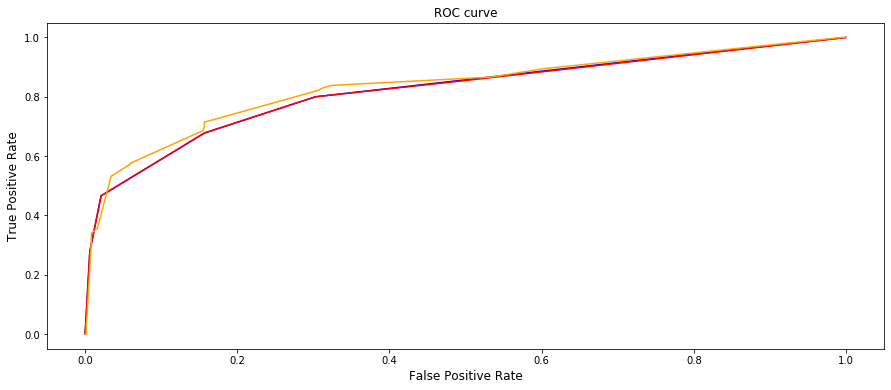

In [62]:
# Roc curve plotting
fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(111)
ax.set_title("ROC curve")
ax.set_xlabel("False Positive Rate",fontsize=12)
ax.set_ylabel("True Positive Rate",fontsize=12)

ax.plot(fpr, tpr,color="blue")
ax.plot(fpr_nb, tpr_nb, color='red')
ax.plot(fpr_2nb, tpr_2nb, color='orange')

plt.show()


In [63]:
# AUC score for each model comparison
Bayes_AUC = roc_auc_score(labels, survival_probability)

Naive_Bayes_AUC = roc_auc_score(labels, survival_probability_nb)

Naive_Bayes_2_AUC = roc_auc_score(labels_2nb, survival_probability_2nb)

print('Bayes AUC = ',Bayes_AUC)
print('Naive Bayes AUC = ',Naive_Bayes_AUC)
print('Naive Bayes 2 AUC = ',Naive_Bayes_2_AUC)

Bayes AUC =  0.8200012360939432
Naive Bayes AUC =  0.8187651421508035
Naive Bayes 2 AUC =  0.8331164187913572
